Спочатку підключимо потрібні біліотеки
---

In [2]:
import os
import requests
from datetime import datetime, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import timeit
from scipy.stats import pearsonr, spearmanr
print("Setup done")

Setup done


Завантаження та підготовка даних 
---

In [3]:

url = "https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip"
folder = "data"
if not os.path.exists("data"):
    os.makedirs("data")

filename = os.path.join(folder, f"household_power_consumption.zip")
try:
    recieved_data = requests.get(url, timeout=3)
    print(recieved_data)
    recieved_data.raise_for_status()
    with open(filename, "wb") as file:
        file.write(recieved_data.content)
    print(f"Saving file in {filename} [OK]")

    if zipfile.is_zipfile(filename):
        with zipfile.ZipFile(filename, "r") as zip_ref:
            zip_ref.extractall("data")

    os.remove(os.path.join(filename))
    dataframe = pd.DataFrame()

    file = os.listdir("data") 
    dataframe = pd.read_csv(os.path.join(folder, file[2]), sep=';', na_values='?')
    dataframe = dataframe.dropna()
    dataframe['Date'] = pd.to_datetime(dataframe['Date'], format='%d/%m/%Y')
    dataframe['Time'] = pd.to_datetime(dataframe['Time'], format='%H:%M:%S').dt.time

    dataframe_numpy = dataframe.to_numpy()
    display(dataframe)

except Exception as e:
    print(f"[Error] {e}")

<Response [200]>
Saving file in data\household_power_consumption.zip [OK]


Date      Time  Global_active_power  Global_reactive_power  \
0       2006-12-16  17:24:00                4.216                  0.418   
1       2006-12-16  17:25:00                5.360                  0.436   
2       2006-12-16  17:26:00                5.374                  0.498   
3       2006-12-16  17:27:00                5.388                  0.502   
4       2006-12-16  17:28:00                3.666                  0.528   
...            ...       ...                  ...                    ...   
2075254 2010-11-26  20:58:00                0.946                  0.000   
2075255 2010-11-26  20:59:00                0.944                  0.000   
2075256 2010-11-26  21:00:00                0.938                  0.000   
2075257 2010-11-26  21:01:00                0.934                  0.000   
2075258 2010-11-26  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0         234.84              18.4             0.0             1.0   
1         233.63              23.0             0.0             1.0   
2         233.29              23.0             0.0             2.0   
3         233.74              23.0             0.0             1.0   
4         235.68              15.8             0.0             1.0   
...          ...               ...             ...             ...   
2075254   240.43               4.0             0.0             0.0   
2075255   240.00               4.0             0.0             0.0   
2075256   239.82               3.8             0.0             0.0   
2075257   239.70               3.8             0.0             0.0   
2075258   239.55               3.8             0.0             0.0   

         Sub_metering_3  
0                  17.0  
1                  16.0  
2                  17.0  
3                  17.0  
4                  17.0  
...                 ...  
2075254             0.0  
2075255             0.0  
2075256             0.0  
2075257             0.0  
2075258             0.0  

[2049280 rows x 9 columns]

Завдання першого рівня
===

#### 1. Обрати всі записи, у яких загальна активна споживана потужність перевищує 5 кВт.

Pandas Dataframe

In [4]:
edited = dataframe[dataframe["Global_active_power"] > 5]
display(edited)
time_100 = timeit.timeit('dataframe[dataframe["Global_active_power"] > 5]', globals = globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

Date      Time  Global_active_power  Global_reactive_power  \
1       2006-12-16  17:25:00                5.360                  0.436   
2       2006-12-16  17:26:00                5.374                  0.498   
3       2006-12-16  17:27:00                5.388                  0.502   
11      2006-12-16  17:35:00                5.412                  0.470   
12      2006-12-16  17:36:00                5.224                  0.478   
...            ...       ...                  ...                    ...   
2069356 2010-11-22  18:40:00                5.408                  0.150   
2069357 2010-11-22  18:41:00                5.528                  0.144   
2071586 2010-11-24  07:50:00                5.172                  0.050   
2071587 2010-11-24  07:51:00                5.750                  0.000   
2072997 2010-11-25  07:21:00                5.074                  0.240   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
1         233.63              23.0             0.0             1.0   
2         233.29              23.0             0.0             2.0   
3         233.74              23.0             0.0             1.0   
11        232.78              23.2             0.0             1.0   
12        232.99              22.4             0.0             1.0   
...          ...               ...             ...             ...   
2069356   231.50              23.6            48.0             0.0   
2069357   232.48              24.6            53.0             0.0   
2071586   235.18              22.0             0.0            38.0   
2071587   234.40              24.6             0.0            39.0   
2072997   238.55              21.4             1.0             2.0   

         Sub_metering_3  
1                  16.0  
2                  17.0  
3                  17.0  
11                 17.0  
12                 16.0  
...                 ...  
2069356             0.0  
2069357             0.0  
2071586            17.0  
2071587            17.0  
2072997            18.0  

[17547 rows x 9 columns]

Time is 0.139342 seconds


Numpy Array

In [5]:
index = dataframe.columns.get_loc('Global_active_power')
filtered = dataframe_numpy[dataframe_numpy[:, index] > 5]
display(filtered)

time_100 = timeit.timeit("dataframe_numpy[dataframe_numpy[:, dataframe.columns.get_loc('Global_active_power')] > 5]", globals = globals(), number=100)

print(f"Time is {time_100:.6f} seconds")

array([[Timestamp('2006-12-16 00:00:00'), datetime.time(17, 25), 5.36,
        ..., 0.0, 1.0, 16.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 26), 5.374,
        ..., 0.0, 2.0, 17.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 27), 5.388,
        ..., 0.0, 1.0, 17.0],
       ...,
       [Timestamp('2010-11-24 00:00:00'), datetime.time(7, 50), 5.172,
        ..., 0.0, 38.0, 17.0],
       [Timestamp('2010-11-24 00:00:00'), datetime.time(7, 51), 5.75,
        ..., 0.0, 39.0, 17.0],
       [Timestamp('2010-11-25 00:00:00'), datetime.time(7, 21), 5.074,
        ..., 1.0, 2.0, 18.0]], shape=(17547, 9), dtype=object)

Time is 2.501612 seconds


#### 2. Обрати всі записи, у яких вольтаж перевищую 235 В.

Pandas Dataframe

In [6]:
edited = dataframe[dataframe['Voltage'] > 235]
display(edited)
time_100 = timeit.timeit("dataframe[dataframe['Voltage'] > 235]", globals = globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

Date      Time  Global_active_power  Global_reactive_power  \
4       2006-12-16  17:28:00                3.666                  0.528   
5       2006-12-16  17:29:00                3.520                  0.522   
6       2006-12-16  17:30:00                3.702                  0.520   
7       2006-12-16  17:31:00                3.700                  0.520   
14      2006-12-16  17:38:00                4.054                  0.422   
...            ...       ...                  ...                    ...   
2075254 2010-11-26  20:58:00                0.946                  0.000   
2075255 2010-11-26  20:59:00                0.944                  0.000   
2075256 2010-11-26  21:00:00                0.938                  0.000   
2075257 2010-11-26  21:01:00                0.934                  0.000   
2075258 2010-11-26  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
4         235.68              15.8             0.0             1.0   
5         235.02              15.0             0.0             2.0   
6         235.09              15.8             0.0             1.0   
7         235.22              15.8             0.0             1.0   
14        235.24              17.6             0.0             1.0   
...          ...               ...             ...             ...   
2075254   240.43               4.0             0.0             0.0   
2075255   240.00               4.0             0.0             0.0   
2075256   239.82               3.8             0.0             0.0   
2075257   239.70               3.8             0.0             0.0   
2075258   239.55               3.8             0.0             0.0   

         Sub_metering_3  
4                  17.0  
5                  17.0  
6                  17.0  
7                  17.0  
14                 17.0  
...                 ...  
2075254             0.0  
2075255             0.0  
2075256             0.0  
2075257             0.0  
2075258             0.0  

[1952491 rows x 9 columns]

Time is 4.831838 seconds


Numpy Array

In [7]:
index = dataframe.columns.get_loc('Voltage')
filtered = dataframe_numpy[dataframe_numpy[:, index] > 235]
display(filtered)

time_100 = timeit.timeit("dataframe_numpy[dataframe_numpy[:, dataframe.columns.get_loc('Voltage')] > 235]", globals = globals(), number=100)

print(f"Time is {time_100:.6f} seconds")

array([[Timestamp('2006-12-16 00:00:00'), datetime.time(17, 28), 3.666,
        ..., 0.0, 1.0, 17.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 29), 3.52,
        ..., 0.0, 2.0, 17.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 30), 3.702,
        ..., 0.0, 1.0, 17.0],
       ...,
       [Timestamp('2010-11-26 00:00:00'), datetime.time(21, 0), 0.938,
        ..., 0.0, 0.0, 0.0],
       [Timestamp('2010-11-26 00:00:00'), datetime.time(21, 1), 0.934,
        ..., 0.0, 0.0, 0.0],
       [Timestamp('2010-11-26 00:00:00'), datetime.time(21, 2), 0.932,
        ..., 0.0, 0.0, 0.0]], shape=(1952491, 9), dtype=object)

Time is 12.786015 seconds


#### 3. Обрати всі записи, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

Pandas Dataframe

In [8]:
edited = dataframe[dataframe["Global_intensity"].between(19, 20)]
edited = edited[edited["Sub_metering_2"] > edited["Sub_metering_3"]]
display(edited)

time_100 = timeit.timeit("dataframe[(dataframe['Global_intensity'].between(19, 20)) & (dataframe['Sub_metering_2'] > dataframe['Sub_metering_3'])]", globals = globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

Date      Time  Global_active_power  Global_reactive_power  \
45      2006-12-16  18:09:00                4.464                  0.136   
460     2006-12-17  01:04:00                4.582                  0.258   
464     2006-12-17  01:08:00                4.618                  0.104   
475     2006-12-17  01:19:00                4.636                  0.140   
476     2006-12-17  01:20:00                4.634                  0.152   
...            ...       ...                  ...                    ...   
2071589 2010-11-24  07:53:00                4.666                  0.000   
2071590 2010-11-24  07:54:00                4.694                  0.000   
2071591 2010-11-24  07:55:00                4.602                  0.000   
2071592 2010-11-24  07:56:00                4.536                  0.000   
2071593 2010-11-24  07:57:00                4.626                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
45        234.66              19.0             0.0            37.0   
460       238.08              19.6             0.0            13.0   
464       239.61              19.6             0.0            27.0   
475       237.37              19.4             0.0            36.0   
476       237.17              19.4             0.0            35.0   
...          ...               ...             ...             ...   
2071589   235.72              19.8             0.0            39.0   
2071590   236.78              19.8             0.0            39.0   
2071591   237.08              19.4             0.0            40.0   
2071592   237.03              19.0             0.0            39.0   
2071593   236.78              19.4             0.0            39.0   

         Sub_metering_3  
45                 16.0  
460                 0.0  
464                 0.0  
475                 0.0  
476                 0.0  
...                 ...  
2071589            17.0  
2071590            18.0  
2071591            17.0  
2071592            17.0  
2071593            17.0  

[2509 rows x 9 columns]

Time is 0.365070 seconds


Numpy Array

In [9]:
gi_idx = dataframe.columns.get_loc('Global_intensity')
sub2_idx = dataframe.columns.get_loc('Sub_metering_2')
sub3_idx = dataframe.columns.get_loc('Sub_metering_3')
filtered = dataframe_numpy[(dataframe_numpy[:, gi_idx] >= 19) & (dataframe_numpy[:, gi_idx] <= 20) & (dataframe_numpy[:, sub2_idx] > dataframe_numpy[:, sub3_idx])]
display(filtered)
display(pd.DataFrame(filtered, columns=dataframe.columns))

time_100 = timeit.timeit("dataframe_numpy[(dataframe_numpy[:, dataframe.columns.get_loc('Global_intensity')] >= 19) & (dataframe_numpy[:, dataframe.columns.get_loc('Global_intensity')] <= 20) &"
"(dataframe_numpy[:, dataframe.columns.get_loc('Sub_metering_2')] > dataframe_numpy[:, dataframe.columns.get_loc('Sub_metering_3')])]",
                         globals = globals(), number=100)

print(f"Time is {time_100:.6f} seconds")

array([[Timestamp('2006-12-16 00:00:00'), datetime.time(18, 9), 4.464,
        ..., 0.0, 37.0, 16.0],
       [Timestamp('2006-12-17 00:00:00'), datetime.time(1, 4), 4.582,
        ..., 0.0, 13.0, 0.0],
       [Timestamp('2006-12-17 00:00:00'), datetime.time(1, 8), 4.618,
        ..., 0.0, 27.0, 0.0],
       ...,
       [Timestamp('2010-11-24 00:00:00'), datetime.time(7, 55), 4.602,
        ..., 0.0, 40.0, 17.0],
       [Timestamp('2010-11-24 00:00:00'), datetime.time(7, 56), 4.536,
        ..., 0.0, 39.0, 17.0],
       [Timestamp('2010-11-24 00:00:00'), datetime.time(7, 57), 4.626,
        ..., 0.0, 39.0, 17.0]], shape=(2509, 9), dtype=object)

Date      Time Global_active_power Global_reactive_power Voltage  \
0    2006-12-16  18:09:00               4.464                 0.136  234.66   
1    2006-12-17  01:04:00               4.582                 0.258  238.08   
2    2006-12-17  01:08:00               4.618                 0.104  239.61   
3    2006-12-17  01:19:00               4.636                  0.14  237.37   
4    2006-12-17  01:20:00               4.634                 0.152  237.17   
...         ...       ...                 ...                   ...     ...   
2504 2010-11-24  07:53:00               4.666                   0.0  235.72   
2505 2010-11-24  07:54:00               4.694                   0.0  236.78   
2506 2010-11-24  07:55:00               4.602                   0.0  237.08   
2507 2010-11-24  07:56:00               4.536                   0.0  237.03   
2508 2010-11-24  07:57:00               4.626                   0.0  236.78   

     Global_intensity Sub_metering_1 Sub_metering_2 Sub_metering_3  
0                19.0            0.0           37.0           16.0  
1                19.6            0.0           13.0            0.0  
2                19.6            0.0           27.0            0.0  
3                19.4            0.0           36.0            0.0  
4                19.4            0.0           35.0            0.0  
...               ...            ...            ...            ...  
2504             19.8            0.0           39.0           17.0  
2505             19.8            0.0           39.0           18.0  
2506             19.4            0.0           40.0           17.0  
2507             19.0            0.0           39.0           17.0  
2508             19.4            0.0           39.0           17.0  

[2509 rows x 9 columns]

Time is 5.766417 seconds


#### 4. Обрати випадковим чином 500000 записів (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії

Pandas Dataframe

In [10]:
part = dataframe.sample(n=500000, replace=False, random_state=78)
mean_sub1_pd = part['Sub_metering_1'].mean()
mean_sub2_pd = part['Sub_metering_2'].mean()
mean_sub3_pd = part['Sub_metering_3'].mean()

print("Pandas Sample:")
display(part)
print("Середнє sub_metering_1:", mean_sub1_pd)
print("Середнє sub_metering_2:", mean_sub2_pd)
print("Середнє sub_metering_3:", mean_sub3_pd)

time_100 = timeit.timeit("dataframe.sample(n=500000, replace=False, random_state=78)[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()", globals = globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

Pandas Sample:


Date      Time  Global_active_power  Global_reactive_power  \
1937879 2010-08-23  11:23:00                0.270                  0.104   
765688  2008-05-31  10:52:00                0.568                  0.212   
1070189 2008-12-28  21:53:00                0.284                  0.080   
1036014 2008-12-05  04:18:00                0.272                  0.054   
905385  2008-09-05  11:09:00                0.142                  0.000   
...            ...       ...                  ...                    ...   
116076  2007-03-07  08:00:00                1.350                  0.084   
174325  2007-04-16  18:49:00                0.126                  0.000   
60060   2007-01-27  10:24:00                1.612                  0.234   
1209194 2009-04-04  10:38:00                1.478                  0.066   
882438  2008-08-20  12:42:00                0.082                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
1937879   241.48               1.2             0.0             0.0   
765688    239.36               2.8             0.0             0.0   
1070189   242.27               1.2             0.0             1.0   
1036014   243.77               1.2             0.0             0.0   
905385    238.92               0.6             0.0             0.0   
...          ...               ...             ...             ...   
116076    236.98               5.6             0.0             0.0   
174325    242.03               0.6             0.0             0.0   
60060     240.13               6.8             0.0             0.0   
1209194   242.85               6.0             0.0             0.0   
882438    242.96               0.2             0.0             0.0   

         Sub_metering_3  
1937879             0.0  
765688              1.0  
1070189             0.0  
1036014             0.0  
905385              1.0  
...                 ...  
116076             17.0  
174325              0.0  
60060              17.0  
1209194            18.0  
882438              0.0  

[500000 rows x 9 columns]

Середнє sub_metering_1: 1.137488
Середнє sub_metering_2: 1.30552
Середнє sub_metering_3: 6.47861
Time is 7.606045 seconds


Numpy Array

In [11]:
def numpy_random_func(dataframe_numpy):
    sample_np = dataframe_numpy[np.random.choice(dataframe_numpy.shape[0], size=500000, replace=False)]
    mean_sub1 = np.mean(sample_np[:, dataframe.columns.get_loc('Sub_metering_1')])
    mean_sub2 = np.mean(sample_np[:, dataframe.columns.get_loc('Sub_metering_2')])
    mean_sub3 = np.mean(sample_np[:, dataframe.columns.get_loc('Sub_metering_3')])

    return mean_sub1, mean_sub2, mean_sub3, sample_np

mean1, mean2, mean3, filtered = numpy_random_func(dataframe_numpy)
display(filtered)
display(pd.DataFrame(filtered, columns=dataframe.columns))
print(f"Sub_metering_1: {mean1}")
print(f"Sub_metering_2: {mean2}")
print(f"Sub_metering_3: {mean3}")

time_100 = timeit.timeit("numpy_random_func(dataframe_numpy)", globals = globals(), number=100)

print(f"Time is {time_100:.6f} seconds")

array([[Timestamp('2010-05-28 00:00:00'), datetime.time(23, 24), 3.094,
        ..., 39.0, 0.0, 1.0],
       [Timestamp('2008-11-22 00:00:00'), datetime.time(0, 45), 0.352,
        ..., 0.0, 1.0, 0.0],
       [Timestamp('2009-06-18 00:00:00'), datetime.time(9, 5), 1.186,
        ..., 0.0, 0.0, 18.0],
       ...,
       [Timestamp('2010-02-16 00:00:00'), datetime.time(20, 56), 2.134,
        ..., 0.0, 0.0, 19.0],
       [Timestamp('2009-05-05 00:00:00'), datetime.time(11, 16), 2.152,
        ..., 0.0, 1.0, 29.0],
       [Timestamp('2010-08-23 00:00:00'), datetime.time(21, 0), 0.902,
        ..., 0.0, 1.0, 0.0]], shape=(500000, 9), dtype=object)

Date      Time Global_active_power Global_reactive_power Voltage  \
0      2010-05-28  23:24:00               3.094                 0.084  240.81   
1      2008-11-22  00:45:00               0.352                 0.078  244.71   
2      2009-06-18  09:05:00               1.186                   0.0  238.72   
3      2009-08-24  00:33:00               0.226                 0.106  239.46   
4      2008-06-02  23:03:00                0.58                 0.376  240.34   
...           ...       ...                 ...                   ...     ...   
499995 2008-08-01  04:57:00               0.312                 0.222  240.27   
499996 2010-06-22  01:31:00                 0.2                   0.0  241.19   
499997 2010-02-16  20:56:00               2.134                  0.07  240.54   
499998 2009-05-05  11:16:00               2.152                 0.278  237.03   
499999 2010-08-23  21:00:00               0.902                 0.508  237.71   

       Global_intensity Sub_metering_1 Sub_metering_2 Sub_metering_3  
0                  12.8           39.0            0.0            1.0  
1                   1.4            0.0            1.0            0.0  
2                   4.8            0.0            0.0           18.0  
3                   1.0            0.0            0.0            0.0  
4                   2.8            0.0            1.0            1.0  
...                 ...            ...            ...            ...  
499995              1.6            0.0            0.0            1.0  
499996              1.2            0.0            0.0            1.0  
499997              8.8            0.0            0.0           19.0  
499998              9.0            0.0            1.0           29.0  
499999              4.2            0.0            1.0            0.0  

[500000 rows x 9 columns]

Sub_metering_1: 1.108068
Sub_metering_2: 1.287884
Sub_metering_3: 6.445648
Time is 16.924679 seconds


#### 5 Обрати ті записи, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

Pandas Dataframe

In [12]:
def fifth_func(dataframe):
    filtered = dataframe[(dataframe['Time'] > pd.to_datetime('18:00:00').time()) & (dataframe['Global_active_power'] > 6)]
    filtered = filtered[(filtered['Sub_metering_2'] > filtered['Sub_metering_1']) & (filtered['Sub_metering_2'] > filtered['Sub_metering_3'])]
    part1 = filtered.iloc[:len(filtered) // 2].iloc[2::3]
    part2 = filtered.iloc[len(filtered) // 2:].iloc[3::4]
    filtered = pd.concat([part1, part2])
    return filtered

filtered = fifth_func(dataframe)
display(filtered)

time_100 = timeit.timeit("fifth_func(dataframe)", globals = globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

Date      Time  Global_active_power  Global_reactive_power  \
43      2006-12-16  18:07:00                6.474                  0.144   
3007    2006-12-18  19:31:00                6.158                  0.442   
17497   2006-12-28  21:01:00                7.062                  0.270   
17500   2006-12-28  21:04:00                7.376                  0.238   
17503   2006-12-28  21:07:00                7.248                  0.000   
...            ...       ...                  ...                    ...   
2066466 2010-11-20  18:30:00                6.620                  0.314   
2066470 2010-11-20  18:34:00                6.266                  0.360   
2066474 2010-11-20  18:38:00                6.302                  0.376   
2066478 2010-11-20  18:42:00                6.238                  0.344   
2066482 2010-11-20  18:46:00                6.438                  0.308   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
43        231.85              27.8             0.0            37.0   
3007      229.08              27.0             0.0            36.0   
17497     235.76              30.2             2.0            65.0   
17500     234.67              31.4             1.0            72.0   
17503     235.34              30.8             1.0            72.0   
...          ...               ...             ...             ...   
2066466   229.00              29.2            18.0            34.0   
2066470   229.82              27.6            14.0            35.0   
2066474   229.65              27.8            15.0            34.0   
2066478   229.37              27.6            14.0            35.0   
2066482   229.26              28.4            13.0            39.0   

         Sub_metering_3  
43                 16.0  
3007                0.0  
17497              17.0  
17500              17.0  
17503              17.0  
...                 ...  
2066466            16.0  
2066470            16.0  
2066474            17.0  
2066478            16.0  
2066482            16.0  

[308 rows x 9 columns]

Time is 4.632472 seconds


Numpy Array

In [13]:
def fifth_func_(dataframe_numpy):
    filtered = dataframe_numpy[(dataframe_numpy[:, 1] > pd.to_datetime('18:00:00').time()) & (dataframe_numpy[:, 2] > 6) &
        (dataframe_numpy[:, 7] > dataframe_numpy[:, 6]) & (dataframe_numpy[:, 7] > dataframe_numpy[:, 8])]

    part1 = filtered[:len(filtered)//2][2::3]
    part2 = filtered[len(filtered)//2:][3::4]
    filtered = np.concatenate((part1, part2), axis=0)

    return filtered

filtered = fifth_func_(dataframe_numpy)
display(filtered)
display(pd.DataFrame(filtered, columns=dataframe.columns))

time_100 = timeit.timeit("fifth_func_(dataframe_numpy)", globals = globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

array([[Timestamp('2006-12-16 00:00:00'), datetime.time(18, 7), 6.474,
        ..., 0.0, 37.0, 16.0],
       [Timestamp('2006-12-18 00:00:00'), datetime.time(19, 31), 6.158,
        ..., 0.0, 36.0, 0.0],
       [Timestamp('2006-12-28 00:00:00'), datetime.time(21, 1), 7.062,
        ..., 2.0, 65.0, 17.0],
       ...,
       [Timestamp('2010-11-20 00:00:00'), datetime.time(18, 38), 6.302,
        ..., 15.0, 34.0, 17.0],
       [Timestamp('2010-11-20 00:00:00'), datetime.time(18, 42), 6.238,
        ..., 14.0, 35.0, 16.0],
       [Timestamp('2010-11-20 00:00:00'), datetime.time(18, 46), 6.438,
        ..., 13.0, 39.0, 16.0]], shape=(308, 9), dtype=object)

Date      Time Global_active_power Global_reactive_power Voltage  \
0   2006-12-16  18:07:00               6.474                 0.144  231.85   
1   2006-12-18  19:31:00               6.158                 0.442  229.08   
2   2006-12-28  21:01:00               7.062                  0.27  235.76   
3   2006-12-28  21:04:00               7.376                 0.238  234.67   
4   2006-12-28  21:07:00               7.248                   0.0  235.34   
..         ...       ...                 ...                   ...     ...   
303 2010-11-20  18:30:00                6.62                 0.314   229.0   
304 2010-11-20  18:34:00               6.266                  0.36  229.82   
305 2010-11-20  18:38:00               6.302                 0.376  229.65   
306 2010-11-20  18:42:00               6.238                 0.344  229.37   
307 2010-11-20  18:46:00               6.438                 0.308  229.26   

    Global_intensity Sub_metering_1 Sub_metering_2 Sub_metering_3  
0               27.8            0.0           37.0           16.0  
1               27.0            0.0           36.0            0.0  
2               30.2            2.0           65.0           17.0  
3               31.4            1.0           72.0           17.0  
4               30.8            1.0           72.0           17.0  
..               ...            ...            ...            ...  
303             29.2           18.0           34.0           16.0  
304             27.6           14.0           35.0           16.0  
305             27.8           15.0           34.0           17.0  
306             27.6           14.0           35.0           16.0  
307             28.4           13.0           39.0           16.0  

[308 rows x 9 columns]

Time is 6.673127 seconds


Другий рівень (ускладнений)
---

Вибір та завантаження даних

In [14]:
url = "https://archive.ics.uci.edu/static/public/360/air+quality.zip"
folder = "data"
if not os.path.exists("data"):
    os.makedirs("data")

headers = [
    "Date", "Time", "CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)",
    "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)",
    "T", "RH", "AH", "empty", "empty_"
]

filename = os.path.join(folder, f"air+quality.zip")
try:
    recieved_data = requests.get(url, timeout=3)
    print(recieved_data)
    recieved_data.raise_for_status()
    with open(filename, "wb") as file:
        file.write(recieved_data.content)
    print(f"Saving file in {filename} [OK]")

    if zipfile.is_zipfile(filename):
        with zipfile.ZipFile(filename, "r") as zip_ref:
            zip_ref.extractall("data")

    os.remove(os.path.join(filename))
    dataframe = pd.DataFrame()

    file = os.listdir("data") 
    dataframe = pd.read_csv(os.path.join(folder, file[0]), sep=';', names=headers, header=0, na_values=["-200"])
    
    # dataframe = dataframe.dropna()
    dataframe['Date'] = pd.to_datetime(dataframe['Date'], format='%d/%m/%Y')
    dataframe['Time'] = pd.to_datetime(dataframe['Time'], format='%H.%M.%S').dt.time
    dataframe = dataframe.replace(",", ".", regex=True)
    numeric_cols = dataframe.columns.drop(['Date', 'Time', "empty", "empty_"])
    dataframe[numeric_cols] = dataframe[numeric_cols].astype(float)
    display(dataframe)
    dataframe_numpy = dataframe.to_numpy()

except Exception as e:
    print(f"[Error] {e}")

<Response [200]>
Saving file in data\air+quality.zip [OK]


Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1    2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2    2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3    2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4    2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   
...         ...       ...     ...          ...       ...       ...   
9466        NaT       NaT     NaN          NaN       NaN       NaN   
9467        NaT       NaT     NaN          NaN       NaN       NaN   
9468        NaT       NaT     NaN          NaN       NaN       NaN   
9469        NaT       NaT     NaN          NaN       NaN       NaN   
9470        NaT       NaT     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9466            NaN      NaN           NaN      NaN           NaN   
9467            NaN      NaN           NaN      NaN           NaN   
9468            NaN      NaN           NaN      NaN           NaN   
9469            NaN      NaN           NaN      NaN           NaN   
9470            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)     T    RH      AH  empty  empty_  
0          1268.0  13.6  48.9  0.7578    NaN     NaN  
1           972.0  13.3  47.7  0.7255    NaN     NaN  
2          1074.0  11.9  54.0  0.7502    NaN     NaN  
3          1203.0  11.0  60.0  0.7867    NaN     NaN  
4          1110.0  11.2  59.6  0.7888    NaN     NaN  
...           ...   ...   ...     ...    ...     ...  
9466          NaN   NaN   NaN     NaN    NaN     NaN  
9467          NaN   NaN   NaN     NaN    NaN     NaN  
9468          NaN   NaN   NaN     NaN    NaN     NaN  
9469          NaN   NaN   NaN     NaN    NaN     NaN  
9470          NaN   NaN   NaN     NaN    NaN     NaN  

[9471 rows x 17 columns]

#### 1. Поборотися із зниклими даними.

Pandas Dataframe

In [15]:
def dropna_pandas(dataframe):
    edited = dataframe.copy()
    edited.drop('empty', axis=1, inplace=True, errors="ignore")
    edited.drop('empty_', axis=1, inplace=True, errors="ignore")
    edited = edited.dropna()
    return edited

edited = dropna_pandas(dataframe)
display(edited)
# display(dataframe)
time_100 = timeit.timeit("dropna_pandas(dataframe)", globals = globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1    2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2    2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3    2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4    2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   
...         ...       ...     ...          ...       ...       ...   
1226 2004-04-30  20:00:00     4.4       1449.0     501.0      19.5   
1227 2004-04-30  21:00:00     3.1       1363.0     234.0      15.1   
1228 2004-04-30  22:00:00     3.0       1371.0     212.0      14.6   
1229 2004-04-30  23:00:00     3.1       1406.0     275.0      13.7   
1230 2004-05-01  00:00:00     3.5       1425.0     275.0      15.2   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
1226         1282.0    254.0         625.0    133.0        2100.0   
1227         1152.0    189.0         684.0    110.0        1951.0   
1228         1136.0    174.0         689.0    102.0        1927.0   
1229         1107.0    167.0         718.0    108.0        1872.0   
1230         1155.0    185.0         709.0    110.0        1936.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
1226       1569.0  19.1  61.1  1.3345  
1227       1495.0  18.2  65.4  1.3529  
1228       1471.0  18.1  66.1  1.3579  
1229       1384.0  17.7  66.9  1.3422  
1230       1789.0  17.8  66.8  1.3460  

[827 rows x 15 columns]

Time is 0.146181 seconds


Numpy Array

In [16]:
def dropna_numpy(array, dataframe, columns=None):
    to_delete = []
    for col in ['Date', 'Time'] + columns:
        idx = dataframe.columns.get_loc(col)
        to_delete.append(idx)

    part1 = array[:, [0, 1]]

    part2 = array.copy()
    part2 = np.delete(part2, to_delete, axis=1)

    part2 = part2.astype(float)
    mask = ~np.isnan(part2).any(axis=1)

    part2 = part2[mask]
    part1 = part1[mask]
    filtered = np.concatenate((part1, part2), axis=1)
    return filtered


filtered = dropna_numpy(dataframe_numpy, dataframe, ["empty", "empty_"])
print(filtered)
# display(pd.DataFrame(dataframe_numpy, columns=dataframe.columns))
display(pd.DataFrame(filtered, columns=dropna_pandas(dataframe).columns))

time_100 = timeit.timeit("dropna_numpy(dataframe_numpy, dataframe, ['empty', 'empty_'])", globals=globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

[[Timestamp('2004-03-10 00:00:00') datetime.time(18, 0) 2.6 ... 13.6 48.9
  0.7578]
 [Timestamp('2004-03-10 00:00:00') datetime.time(19, 0) 2.0 ... 13.3 47.7
  0.7255]
 [Timestamp('2004-03-10 00:00:00') datetime.time(20, 0) 2.2 ... 11.9 54.0
  0.7502]
 ...
 [Timestamp('2004-04-30 00:00:00') datetime.time(22, 0) 3.0 ... 18.1 66.1
  1.3579]
 [Timestamp('2004-04-30 00:00:00') datetime.time(23, 0) 3.1 ... 17.7 66.9
  1.3422]
 [Timestamp('2004-05-01 00:00:00') datetime.time(0, 0) 3.5 ... 17.8 66.8
  1.346]]


Date      Time CO(GT) PT08.S1(CO) NMHC(GT) C6H6(GT) PT08.S2(NMHC)  \
0   2004-03-10  18:00:00    2.6      1360.0    150.0     11.9        1046.0   
1   2004-03-10  19:00:00    2.0      1292.0    112.0      9.4         955.0   
2   2004-03-10  20:00:00    2.2      1402.0     88.0      9.0         939.0   
3   2004-03-10  21:00:00    2.2      1376.0     80.0      9.2         948.0   
4   2004-03-10  22:00:00    1.6      1272.0     51.0      6.5         836.0   
..         ...       ...    ...         ...      ...      ...           ...   
822 2004-04-30  20:00:00    4.4      1449.0    501.0     19.5        1282.0   
823 2004-04-30  21:00:00    3.1      1363.0    234.0     15.1        1152.0   
824 2004-04-30  22:00:00    3.0      1371.0    212.0     14.6        1136.0   
825 2004-04-30  23:00:00    3.1      1406.0    275.0     13.7        1107.0   
826 2004-05-01  00:00:00    3.5      1425.0    275.0     15.2        1155.0   

    NOx(GT) PT08.S3(NOx) NO2(GT) PT08.S4(NO2) PT08.S5(O3)     T    RH      AH  
0     166.0       1056.0   113.0       1692.0      1268.0  13.6  48.9  0.7578  
1     103.0       1174.0    92.0       1559.0       972.0  13.3  47.7  0.7255  
2     131.0       1140.0   114.0       1555.0      1074.0  11.9  54.0  0.7502  
3     172.0       1092.0   122.0       1584.0      1203.0  11.0  60.0  0.7867  
4     131.0       1205.0   116.0       1490.0      1110.0  11.2  59.6  0.7888  
..      ...          ...     ...          ...         ...   ...   ...     ...  
822   254.0        625.0   133.0       2100.0      1569.0  19.1  61.1  1.3345  
823   189.0        684.0   110.0       1951.0      1495.0  18.2  65.4  1.3529  
824   174.0        689.0   102.0       1927.0      1471.0  18.1  66.1  1.3579  
825   167.0        718.0   108.0       1872.0      1384.0  17.7  66.9  1.3422  
826   185.0        709.0   110.0       1936.0      1789.0  17.8  66.8   1.346  

[827 rows x 15 columns]

Time is 0.214188 seconds


In [17]:
dataframe_numpy = dropna_numpy(dataframe_numpy, dataframe, ["empty", "empty_"])
dataframe = dropna_pandas(dataframe)
display(dataframe)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1    2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2    2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3    2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4    2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   
...         ...       ...     ...          ...       ...       ...   
1226 2004-04-30  20:00:00     4.4       1449.0     501.0      19.5   
1227 2004-04-30  21:00:00     3.1       1363.0     234.0      15.1   
1228 2004-04-30  22:00:00     3.0       1371.0     212.0      14.6   
1229 2004-04-30  23:00:00     3.1       1406.0     275.0      13.7   
1230 2004-05-01  00:00:00     3.5       1425.0     275.0      15.2   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
1226         1282.0    254.0         625.0    133.0        2100.0   
1227         1152.0    189.0         684.0    110.0        1951.0   
1228         1136.0    174.0         689.0    102.0        1927.0   
1229         1107.0    167.0         718.0    108.0        1872.0   
1230         1155.0    185.0         709.0    110.0        1936.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
1226       1569.0  19.1  61.1  1.3345  
1227       1495.0  18.2  65.4  1.3529  
1228       1471.0  18.1  66.1  1.3579  
1229       1384.0  17.7  66.9  1.3422  
1230       1789.0  17.8  66.8  1.3460  

[827 rows x 15 columns]

#### 2. Пронормувати вибраний датасет або стандартизувати його (нормування і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

##### Нормування

Pandas Dataframe

In [18]:
def norming(dataframe):
    norm = dataframe.copy()
    for col in numeric_cols:
        min  = dataframe[col].min()
        max = dataframe[col].max()
        norm[col] = (dataframe[col] - min) / (max - min)
    return norm


display(norming(dataframe))
display(dataframe)

time_100 = timeit.timeit("norming(dataframe)", globals=globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

Date      Time    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00  0.294872     0.471639  0.120981  0.294574   
1    2004-03-10  19:00:00  0.217949     0.418803  0.088832  0.229974   
2    2004-03-10  20:00:00  0.243590     0.504274  0.068528  0.219638   
3    2004-03-10  21:00:00  0.243590     0.484071  0.061760  0.224806   
4    2004-03-10  22:00:00  0.166667     0.403263  0.037225  0.155039   
...         ...       ...       ...          ...       ...       ...   
1226 2004-04-30  20:00:00  0.525641     0.540793  0.417936  0.490956   
1227 2004-04-30  21:00:00  0.358974     0.473970  0.192047  0.377261   
1228 2004-04-30  22:00:00  0.346154     0.480186  0.173435  0.364341   
1229 2004-04-30  23:00:00  0.358974     0.507382  0.226734  0.341085   
1230 2004-05-01  00:00:00  0.410256     0.522145  0.226734  0.379845   

      PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  \
0          0.457887  0.330472      0.403664  0.531073      0.427494   
1          0.388208  0.195279      0.483718  0.412429      0.350348   
2          0.375957  0.255365      0.460651  0.536723      0.348028   
3          0.382848  0.343348      0.428087  0.581921      0.364849   
4          0.297090  0.255365      0.504749  0.548023      0.310325   
...             ...       ...           ...       ...           ...   
1226       0.638591  0.519313      0.111262  0.644068      0.664153   
1227       0.539051  0.379828      0.151289  0.514124      0.577726   
1228       0.526799  0.347639      0.154681  0.468927      0.563805   
1229       0.504594  0.332618      0.174355  0.502825      0.531903   
1230       0.541348  0.371245      0.168250  0.514124      0.569026   

      PT08.S5(O3)         T        RH        AH  
0        0.479485  0.308017  0.497804  0.328285  
1        0.338263  0.295359  0.480234  0.298458  
2        0.386927  0.236287  0.572474  0.321267  
3        0.448473  0.198312  0.660322  0.354973  
4        0.404103  0.206751  0.654466  0.356912  
...           ...       ...       ...       ...  
1226     0.623092  0.540084  0.676428  0.860837  
1227     0.587786  0.502110  0.739385  0.877828  
1228     0.576336  0.497890  0.749634  0.882445  
1229     0.534828  0.481013  0.761347  0.867947  
1230     0.728053  0.485232  0.759883  0.871456  

[827 rows x 15 columns]

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1    2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2    2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3    2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4    2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   
...         ...       ...     ...          ...       ...       ...   
1226 2004-04-30  20:00:00     4.4       1449.0     501.0      19.5   
1227 2004-04-30  21:00:00     3.1       1363.0     234.0      15.1   
1228 2004-04-30  22:00:00     3.0       1371.0     212.0      14.6   
1229 2004-04-30  23:00:00     3.1       1406.0     275.0      13.7   
1230 2004-05-01  00:00:00     3.5       1425.0     275.0      15.2   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
1226         1282.0    254.0         625.0    133.0        2100.0   
1227         1152.0    189.0         684.0    110.0        1951.0   
1228         1136.0    174.0         689.0    102.0        1927.0   
1229         1107.0    167.0         718.0    108.0        1872.0   
1230         1155.0    185.0         709.0    110.0        1936.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
1226       1569.0  19.1  61.1  1.3345  
1227       1495.0  18.2  65.4  1.3529  
1228       1471.0  18.1  66.1  1.3579  
1229       1384.0  17.7  66.9  1.3422  
1230       1789.0  17.8  66.8  1.3460  

[827 rows x 15 columns]

Time is 0.142636 seconds


Numpy Array

In [19]:
def norming_numpy(dataframe_numpy):
    norm = dataframe_numpy.copy()
    for col in numeric_cols:
        idx = dataframe.columns.get_loc(col)
        min  = dataframe_numpy[:, idx].min()
        max = dataframe_numpy[:, idx].max()
        norm[:, idx] = (dataframe_numpy[:, idx] - min) / (max - min)
    return norm

# display(dataframe_numpy)
# display(pd.DataFrame(dataframe_numpy, columns=dataframe.columns))
display(norming_numpy(dataframe_numpy))
display(pd.DataFrame(norming_numpy(dataframe_numpy), columns=norming(dataframe).columns))
display(dataframe)

time_100 = timeit.timeit("norming(dataframe)", globals=globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

array([[Timestamp('2004-03-10 00:00:00'), datetime.time(18, 0),
        0.29487179487179493, ..., 0.3080168776371308, 0.4978038067349927,
        0.32828516021793336],
       [Timestamp('2004-03-10 00:00:00'), datetime.time(19, 0),
        0.21794871794871795, ..., 0.2953586497890296, 0.4802342606149342,
        0.29845784467633213],
       [Timestamp('2004-03-10 00:00:00'), datetime.time(20, 0),
        0.2435897435897436, ..., 0.23628691983122366, 0.5724743777452417,
        0.3212669683257918],
       ...,
       [Timestamp('2004-04-30 00:00:00'), datetime.time(22, 0),
        0.3461538461538462, ..., 0.4978902953586498, 0.7496339677891655,
        0.8824452858066305],
       [Timestamp('2004-04-30 00:00:00'), datetime.time(23, 0),
        0.35897435897435903, ..., 0.48101265822784806,
        0.7613469985358713, 0.8679471788715487],
       [Timestamp('2004-05-01 00:00:00'), datetime.time(0, 0),
        0.4102564102564103, ..., 0.48523206751054854, 0.7598828696925329,
        0.8714

Date      Time    CO(GT) PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0   2004-03-10  18:00:00  0.294872    0.471639  0.120981  0.294574   
1   2004-03-10  19:00:00  0.217949    0.418803  0.088832  0.229974   
2   2004-03-10  20:00:00   0.24359    0.504274  0.068528  0.219638   
3   2004-03-10  21:00:00   0.24359    0.484071   0.06176  0.224806   
4   2004-03-10  22:00:00  0.166667    0.403263  0.037225  0.155039   
..         ...       ...       ...         ...       ...       ...   
822 2004-04-30  20:00:00  0.525641    0.540793  0.417936  0.490956   
823 2004-04-30  21:00:00  0.358974     0.47397  0.192047  0.377261   
824 2004-04-30  22:00:00  0.346154    0.480186  0.173435  0.364341   
825 2004-04-30  23:00:00  0.358974    0.507382  0.226734  0.341085   
826 2004-05-01  00:00:00  0.410256    0.522145  0.226734  0.379845   

    PT08.S2(NMHC)   NOx(GT) PT08.S3(NOx)   NO2(GT) PT08.S4(NO2) PT08.S5(O3)  \
0        0.457887  0.330472     0.403664  0.531073     0.427494    0.479485   
1        0.388208  0.195279     0.483718  0.412429     0.350348    0.338263   
2        0.375957  0.255365     0.460651  0.536723     0.348028    0.386927   
3        0.382848  0.343348     0.428087  0.581921     0.364849    0.448473   
4         0.29709  0.255365     0.504749  0.548023     0.310325    0.404103   
..            ...       ...          ...       ...          ...         ...   
822      0.638591  0.519313     0.111262  0.644068     0.664153    0.623092   
823      0.539051  0.379828     0.151289  0.514124     0.577726    0.587786   
824      0.526799  0.347639     0.154681  0.468927     0.563805    0.576336   
825      0.504594  0.332618     0.174355  0.502825     0.531903    0.534828   
826      0.541348  0.371245      0.16825  0.514124     0.569026    0.728053   

            T        RH        AH  
0    0.308017  0.497804  0.328285  
1    0.295359  0.480234  0.298458  
2    0.236287  0.572474  0.321267  
3    0.198312  0.660322  0.354973  
4    0.206751  0.654466  0.356912  
..        ...       ...       ...  
822  0.540084  0.676428  0.860837  
823   0.50211  0.739385  0.877828  
824   0.49789  0.749634  0.882445  
825  0.481013  0.761347  0.867947  
826  0.485232  0.759883  0.871456  

[827 rows x 15 columns]

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1    2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2    2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3    2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4    2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   
...         ...       ...     ...          ...       ...       ...   
1226 2004-04-30  20:00:00     4.4       1449.0     501.0      19.5   
1227 2004-04-30  21:00:00     3.1       1363.0     234.0      15.1   
1228 2004-04-30  22:00:00     3.0       1371.0     212.0      14.6   
1229 2004-04-30  23:00:00     3.1       1406.0     275.0      13.7   
1230 2004-05-01  00:00:00     3.5       1425.0     275.0      15.2   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
1226         1282.0    254.0         625.0    133.0        2100.0   
1227         1152.0    189.0         684.0    110.0        1951.0   
1228         1136.0    174.0         689.0    102.0        1927.0   
1229         1107.0    167.0         718.0    108.0        1872.0   
1230         1155.0    185.0         709.0    110.0        1936.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
1226       1569.0  19.1  61.1  1.3345  
1227       1495.0  18.2  65.4  1.3529  
1228       1471.0  18.1  66.1  1.3579  
1229       1384.0  17.7  66.9  1.3422  
1230       1789.0  17.8  66.8  1.3460  

[827 rows x 15 columns]

Time is 0.141291 seconds


##### Стандартизація

Pandas Dataframe

In [20]:
def standartization(dataframe):
    standarted = dataframe.copy()
    for col in numeric_cols:
        mean = dataframe[col].mean()
        std = dataframe[col].std()
        standarted[col] = (dataframe[col] - mean) / std
    return standarted

display(standartization(dataframe))
display(dataframe)

time_100 = timeit.timeit("standartization(dataframe)", globals=globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

Date      Time    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00  0.174838     0.629075 -0.388682  0.152181   
1    2004-03-10  19:00:00 -0.250846     0.347870 -0.570969 -0.184831   
2    2004-03-10  20:00:00 -0.108952     0.802760 -0.686098 -0.238753   
3    2004-03-10  21:00:00 -0.108952     0.695240 -0.724475 -0.211792   
4    2004-03-10  22:00:00 -0.534636     0.265163 -0.863589 -0.575765   
...         ...       ...       ...          ...       ...       ...   
1226 2004-04-30  20:00:00  1.451890     0.997121  1.295079  1.176697   
1227 2004-04-30  21:00:00  0.529574     0.641481  0.014269  0.583556   
1228 2004-04-30  22:00:00  0.458627     0.674563 -0.091266  0.516154   
1229 2004-04-30  23:00:00  0.529574     0.819301  0.210948  0.394830   
1230 2004-05-01  00:00:00  0.813364     0.897873  0.210948  0.597037   

      PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  \
0          0.299837  0.274939      0.348618  0.404525      0.302290   
1         -0.041723 -0.494952      0.792370 -0.262273     -0.137683   
2         -0.101778 -0.152778      0.664510  0.436277     -0.150915   
3         -0.067997  0.348262      0.484000  0.690295     -0.054981   
4         -0.488379 -0.152778      0.908949  0.499781     -0.365939   
...             ...       ...           ...       ...           ...   
1226       1.185641  1.350343     -1.272205  1.039570      1.651979   
1227       0.697698  0.556011     -1.050329  0.309268      1.159078   
1228       0.637644  0.372703     -1.031526  0.055250      1.079684   
1229       0.528795  0.287160     -0.922469  0.245763      0.897741   
1230       0.708958  0.507129     -0.956314  0.309268      1.109457   

      PT08.S5(O3)         T        RH        AH  
0        0.555282 -0.414782 -0.009837 -0.414847  
1       -0.184469 -0.476955 -0.088439 -0.595793  
2        0.070445 -0.767092  0.324222 -0.457422  
3        0.392836 -0.953609  0.717233 -0.252947  
4        0.160415 -0.912160  0.691033 -0.241183  
...           ...       ...       ...       ...  
1226     1.307528  0.725042  0.789285  2.815859  
1227     1.122591  0.538525  1.070943  2.918937  
1228     1.062611  0.517801  1.116795  2.946947  
1229     0.845184  0.434905  1.169196  2.858995  
1230     1.857343  0.455629  1.162646  2.880283  

[827 rows x 15 columns]

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1    2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2    2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3    2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4    2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   
...         ...       ...     ...          ...       ...       ...   
1226 2004-04-30  20:00:00     4.4       1449.0     501.0      19.5   
1227 2004-04-30  21:00:00     3.1       1363.0     234.0      15.1   
1228 2004-04-30  22:00:00     3.0       1371.0     212.0      14.6   
1229 2004-04-30  23:00:00     3.1       1406.0     275.0      13.7   
1230 2004-05-01  00:00:00     3.5       1425.0     275.0      15.2   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
1226         1282.0    254.0         625.0    133.0        2100.0   
1227         1152.0    189.0         684.0    110.0        1951.0   
1228         1136.0    174.0         689.0    102.0        1927.0   
1229         1107.0    167.0         718.0    108.0        1872.0   
1230         1155.0    185.0         709.0    110.0        1936.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
1226       1569.0  19.1  61.1  1.3345  
1227       1495.0  18.2  65.4  1.3529  
1228       1471.0  18.1  66.1  1.3579  
1229       1384.0  17.7  66.9  1.3422  
1230       1789.0  17.8  66.8  1.3460  

[827 rows x 15 columns]

Time is 0.162953 seconds


Numpy Array

In [21]:
def standartization_numpy(dataframe_numpy):
    standarted = dataframe_numpy.copy()
    for col in numeric_cols:
        idx = dataframe.columns.get_loc(col)
        mean = dataframe_numpy[:, idx].mean()
        std = dataframe_numpy[:, idx].std()
        standarted[:, idx] = (dataframe_numpy[:, idx] - mean) / std
    return standarted

display(standartization_numpy(dataframe_numpy))
display(pd.DataFrame(standartization_numpy(dataframe_numpy), columns=standartization(dataframe).columns))
display(dataframe)

time_100 = timeit.timeit("standartization_numpy(dataframe_numpy)", globals=globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

array([[Timestamp('2004-03-10 00:00:00'), datetime.time(18, 0),
        0.17494338858562647, ..., -0.41503338588125765,
        -0.009843109746168541, -0.4150979025706838],
       [Timestamp('2004-03-10 00:00:00'), datetime.time(19, 0),
        -0.2509982670384535, ..., -0.4772432596349669,
        -0.08849288520586342, -0.596153831691595],
       [Timestamp('2004-03-10 00:00:00'), datetime.time(20, 0),
        -0.10901771516376006, ..., -0.7675560038189445,
        0.32441843595753594, -0.4576992976579573],
       ...,
       [Timestamp('2004-04-30 00:00:00'), datetime.time(22, 0),
        0.458904492335013, ..., 0.5181147204243847, 1.1174703385094618,
        2.9487306753072975],
       [Timestamp('2004-04-30 00:00:00'), datetime.time(23, 0),
        0.5298947682723597, ..., 0.43516822208610495, 1.169903522149259,
        2.8607251617717457],
       [Timestamp('2004-05-01 00:00:00'), datetime.time(0, 0),
        0.8138558720217463, ..., 0.4559048466706751, 1.163349374194284,
        

Date      Time    CO(GT) PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0   2004-03-10  18:00:00  0.174943    0.629455 -0.388917  0.152273   
1   2004-03-10  19:00:00 -0.250998    0.348081 -0.571315 -0.184943   
2   2004-03-10  20:00:00 -0.109018    0.803245 -0.686514 -0.238897   
3   2004-03-10  21:00:00 -0.109018    0.695661 -0.724913  -0.21192   
4   2004-03-10  22:00:00 -0.534959    0.265323 -0.864111 -0.576113   
..         ...       ...       ...         ...       ...       ...   
822 2004-04-30  20:00:00  1.452768    0.997725  1.295863   1.17741   
823 2004-04-30  21:00:00  0.529895    0.641869  0.014278   0.58391   
824 2004-04-30  22:00:00  0.458904    0.674972 -0.091321  0.516466   
825 2004-04-30  23:00:00  0.529895    0.819797  0.211076  0.395069   
826 2004-05-01  00:00:00  0.813856    0.898416  0.211076  0.597398   

    PT08.S2(NMHC)   NOx(GT) PT08.S3(NOx)   NO2(GT) PT08.S4(NO2) PT08.S5(O3)  \
0        0.300018  0.275105     0.348829  0.404769     0.302473    0.555618   
1       -0.041748 -0.495252      0.79285 -0.262432    -0.137766   -0.184581   
2       -0.101839 -0.152871     0.664912  0.436541    -0.151006    0.070487   
3       -0.068038  0.348473     0.484293  0.690713    -0.055014    0.393074   
4       -0.488674 -0.152871       0.9095  0.500084     -0.36616    0.160512   
..            ...       ...          ...       ...          ...         ...   
822      1.186359   1.35116    -1.272975  1.040199     1.652979     1.30832   
823       0.69812  0.556347    -1.050965  0.309455     1.159779     1.12327   
824      0.638029  0.372929    -1.032151  0.055283     1.080338    1.063254   
825      0.529115  0.287333    -0.923027  0.245912     0.898284    0.845695   
826      0.709387  0.507435    -0.956893  0.309455     1.110128    1.858467   

            T        RH        AH  
0   -0.415033 -0.009843 -0.415098  
1   -0.477243 -0.088493 -0.596154  
2   -0.767556  0.324418 -0.457699  
3   -0.954186  0.717667   -0.2531  
4   -0.912712  0.691451 -0.241329  
..        ...       ...       ...  
822  0.725481  0.789763  2.817563  
823  0.538851  1.071591  2.920703  
824  0.518115   1.11747  2.948731  
825  0.435168  1.169904  2.860725  
826  0.455905  1.163349  2.882026  

[827 rows x 15 columns]

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1    2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2    2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3    2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4    2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   
...         ...       ...     ...          ...       ...       ...   
1226 2004-04-30  20:00:00     4.4       1449.0     501.0      19.5   
1227 2004-04-30  21:00:00     3.1       1363.0     234.0      15.1   
1228 2004-04-30  22:00:00     3.0       1371.0     212.0      14.6   
1229 2004-04-30  23:00:00     3.1       1406.0     275.0      13.7   
1230 2004-05-01  00:00:00     3.5       1425.0     275.0      15.2   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
1226         1282.0    254.0         625.0    133.0        2100.0   
1227         1152.0    189.0         684.0    110.0        1951.0   
1228         1136.0    174.0         689.0    102.0        1927.0   
1229         1107.0    167.0         718.0    108.0        1872.0   
1230         1155.0    185.0         709.0    110.0        1936.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
1226       1569.0  19.1  61.1  1.3345  
1227       1495.0  18.2  65.4  1.3529  
1228       1471.0  18.1  66.1  1.3579  
1229       1384.0  17.7  66.9  1.3422  
1230       1789.0  17.8  66.8  1.3460  

[827 rows x 15 columns]

Time is 0.171023 seconds


#### 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

Pandas Dataframe

Time is 2.272604 seconds


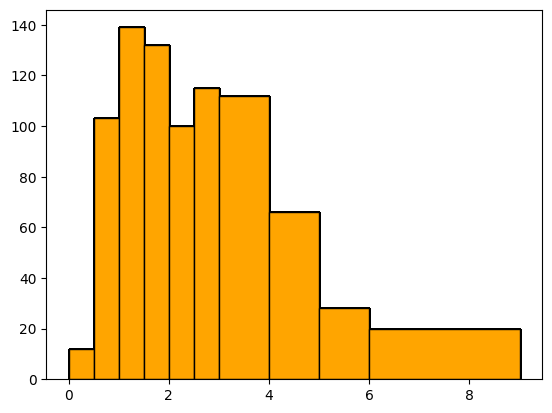

In [22]:
ranges = [0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 6, 9]

plt.hist(dataframe['CO(GT)'], bins=ranges, color='orange', edgecolor='black')

time_1000 = timeit.timeit("plt.hist(dataframe['CO(GT)'], bins=ranges, color='orange', edgecolor='black')", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

Numpy Array

Time is 2.289300 seconds


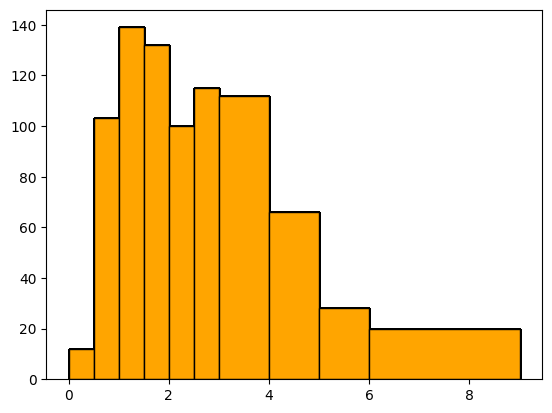

In [23]:
ranges = [0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 6, 9]
co = dataframe_numpy[:, 2]

plt.hist(co, bins=ranges, color='orange', edgecolor='black')

time_1000 = timeit.timeit("plt.hist(dataframe_numpy[:, 2].astype(float), bins=ranges, color='orange', edgecolor='black')", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

#### 4. Збудувати графік залежності одного integer/real атрибута від іншого.

Pandas Dataframe

Time is 0.919228 seconds


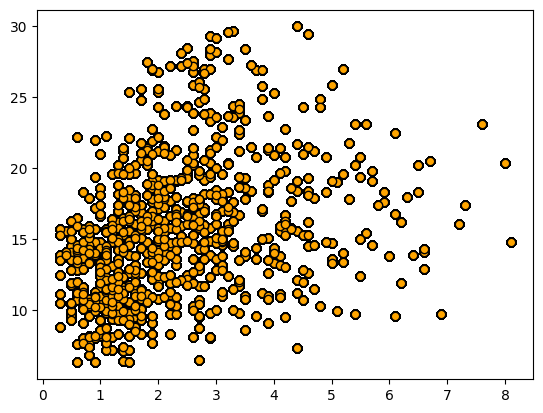

In [24]:
x = dataframe["CO(GT)"]
y = dataframe["T"]
plt.scatter(x, y, color='orange', edgecolor='black')

time_1000 = timeit.timeit("plt.scatter(dataframe['CO(GT)'], dataframe['T'], color='orange', edgecolor='black')", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

Numpy Array

Time is 0.859267 seconds


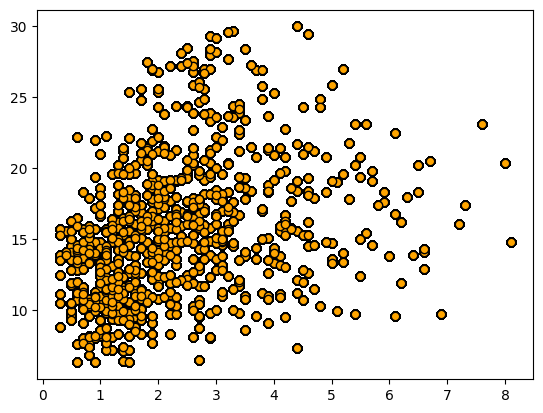

In [25]:
x = dataframe_numpy[:, 2]
y = dataframe_numpy[:, 12]
plt.scatter(x, y, color='orange', edgecolor='black')

time_1000 = timeit.timeit("plt.scatter(dataframe_numpy[:, 2], dataframe_numpy[:, 12], color='orange', edgecolor='black')", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

#### 5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

Pandas Dataframe

In [26]:
def pearson_spearman(dataframe):
    x = dataframe["CO(GT)"]
    y = dataframe["C6H6(GT)"]

    pearson_coef = x.corr(y, method="pearson")
    spearman_coef = x.corr(y, method="spearman")



    return pearson_coef, spearman_coef

pearson_coef, spearman_coef = pearson_spearman(dataframe)
print(f"Коефіцієнт Пірсона:  {pearson_coef:.4f}")
print(f"Коефіцієнт Спірмена: {spearman_coef:.4f}")

time_1000 = timeit.timeit("pearson_spearman(dataframe)", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

Коефіцієнт Пірсона:  0.9727
Коефіцієнт Спірмена: 0.9766
Time is 0.267262 seconds


Numpy Array

In [27]:
def pearson_spearman_(dataframe_numpy):

    x = dataframe_numpy[:, 2].astype(float)
    y = dataframe_numpy[:, 5].astype(float)
    pearson_coef, _ = pearsonr(x, y)
    spearman_coef, _ = spearmanr(x, y)

    return pearson_coef, spearman_coef

pearson_coef, spearman_coef = pearson_spearman_(dataframe_numpy)
print(f"Коефіцієнт Пірсона:  {pearson_coef:.4f}")
print(f"Коефіцієнт Спірмена: {spearman_coef:.4f}")

time_1000 = timeit.timeit("pearson_spearman_(dataframe_numpy)", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

Коефіцієнт Пірсона:  0.9727
Коефіцієнт Спірмена: 0.9766
Time is 0.330644 seconds


#### 6. Провести One Hot Encoding категоріального string атрибуту.

Pandas Dataframe

In [28]:
def ohe_pandas(dataframe):
    edited = dataframe.copy()
    edited['hour'] = edited['Time'].apply(lambda t: str(t.hour))

    df_ohe = pd.get_dummies(edited[['Time', 'hour']], columns=['hour'], prefix='hour')
    return df_ohe


display(ohe_pandas(dataframe))

time_1000 = timeit.timeit("ohe_pandas(dataframe)", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

Time  hour_0  hour_1  hour_10  hour_11  hour_12  hour_13  hour_14  \
0     18:00:00   False   False    False    False    False    False    False   
1     19:00:00   False   False    False    False    False    False    False   
2     20:00:00   False   False    False    False    False    False    False   
3     21:00:00   False   False    False    False    False    False    False   
4     22:00:00   False   False    False    False    False    False    False   
...        ...     ...     ...      ...      ...      ...      ...      ...   
1226  20:00:00   False   False    False    False    False    False    False   
1227  21:00:00   False   False    False    False    False    False    False   
1228  22:00:00   False   False    False    False    False    False    False   
1229  23:00:00   False   False    False    False    False    False    False   
1230  00:00:00    True   False    False    False    False    False    False   

      hour_15  hour_16  ...  hour_20  hour_21  hour_22  hour_23  hour_4  \
0       False    False  ...    False    False    False    False   False   
1       False    False  ...    False    False    False    False   False   
2       False    False  ...     True    False    False    False   False   
3       False    False  ...    False     True    False    False   False   
4       False    False  ...    False    False     True    False   False   
...       ...      ...  ...      ...      ...      ...      ...     ...   
1226    False    False  ...     True    False    False    False   False   
1227    False    False  ...    False     True    False    False   False   
1228    False    False  ...    False    False     True    False   False   
1229    False    False  ...    False    False    False     True   False   
1230    False    False  ...    False    False    False    False   False   

      hour_5  hour_6  hour_7  hour_8  hour_9  
0      False   False   False   False   False  
1      False   False   False   False   False  
2      False   False   False   False   False  
3      False   False   False   False   False  
4      False   False   False   False   False  
...      ...     ...     ...     ...     ...  
1226   False   False   False   False   False  
1227   False   False   False   False   False  
1228   False   False   False   False   False  
1229   False   False   False   False   False  
1230   False   False   False   False   False  

[827 rows x 24 columns]

Time is 0.845116 seconds


Numpy Array

In [29]:

def ohe_numpy(dataframe_numpy):

    hours = np.array([t.hour for t in dataframe_numpy[:, 1]])

    unique_hours = np.arange(24)
    ohe = (hours[:, None] == unique_hours[None, :]).astype(int)

    con = np.concatenate((dataframe_numpy[:, 1][:, None], ohe), axis=1)
    return con

con = ohe_numpy(dataframe_numpy)
df_ohe_np = pd.DataFrame(con, columns=['Time'] + [f"hour_{h}" for h in np.arange(24)])
display(df_ohe_np)

time_1000 = timeit.timeit("ohe_numpy(dataframe_numpy)", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

Time hour_0 hour_1 hour_2 hour_3 hour_4 hour_5 hour_6 hour_7 hour_8  \
0    18:00:00      0      0      0      0      0      0      0      0      0   
1    19:00:00      0      0      0      0      0      0      0      0      0   
2    20:00:00      0      0      0      0      0      0      0      0      0   
3    21:00:00      0      0      0      0      0      0      0      0      0   
4    22:00:00      0      0      0      0      0      0      0      0      0   
..        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
822  20:00:00      0      0      0      0      0      0      0      0      0   
823  21:00:00      0      0      0      0      0      0      0      0      0   
824  22:00:00      0      0      0      0      0      0      0      0      0   
825  23:00:00      0      0      0      0      0      0      0      0      0   
826  00:00:00      1      0      0      0      0      0      0      0      0   

     ... hour_14 hour_15 hour_16 hour_17 hour_18 hour_19 hour_20 hour_21  \
0    ...       0       0       0       0       1       0       0       0   
1    ...       0       0       0       0       0       1       0       0   
2    ...       0       0       0       0       0       0       1       0   
3    ...       0       0       0       0       0       0       0       1   
4    ...       0       0       0       0       0       0       0       0   
..   ...     ...     ...     ...     ...     ...     ...     ...     ...   
822  ...       0       0       0       0       0       0       1       0   
823  ...       0       0       0       0       0       0       0       1   
824  ...       0       0       0       0       0       0       0       0   
825  ...       0       0       0       0       0       0       0       0   
826  ...       0       0       0       0       0       0       0       0   

    hour_22 hour_23  
0         0       0  
1         0       0  
2         0       0  
3         0       0  
4         1       0  
..      ...     ...  
822       0       0  
823       0       0  
824       1       0  
825       0       1  
826       0       0  

[827 rows x 25 columns]

Time is 0.129240 seconds


#### 7. Провести візуалізацію багатовимірних даних

Pandas Dataframe

<Figure size 1200x1000 with 0 Axes>

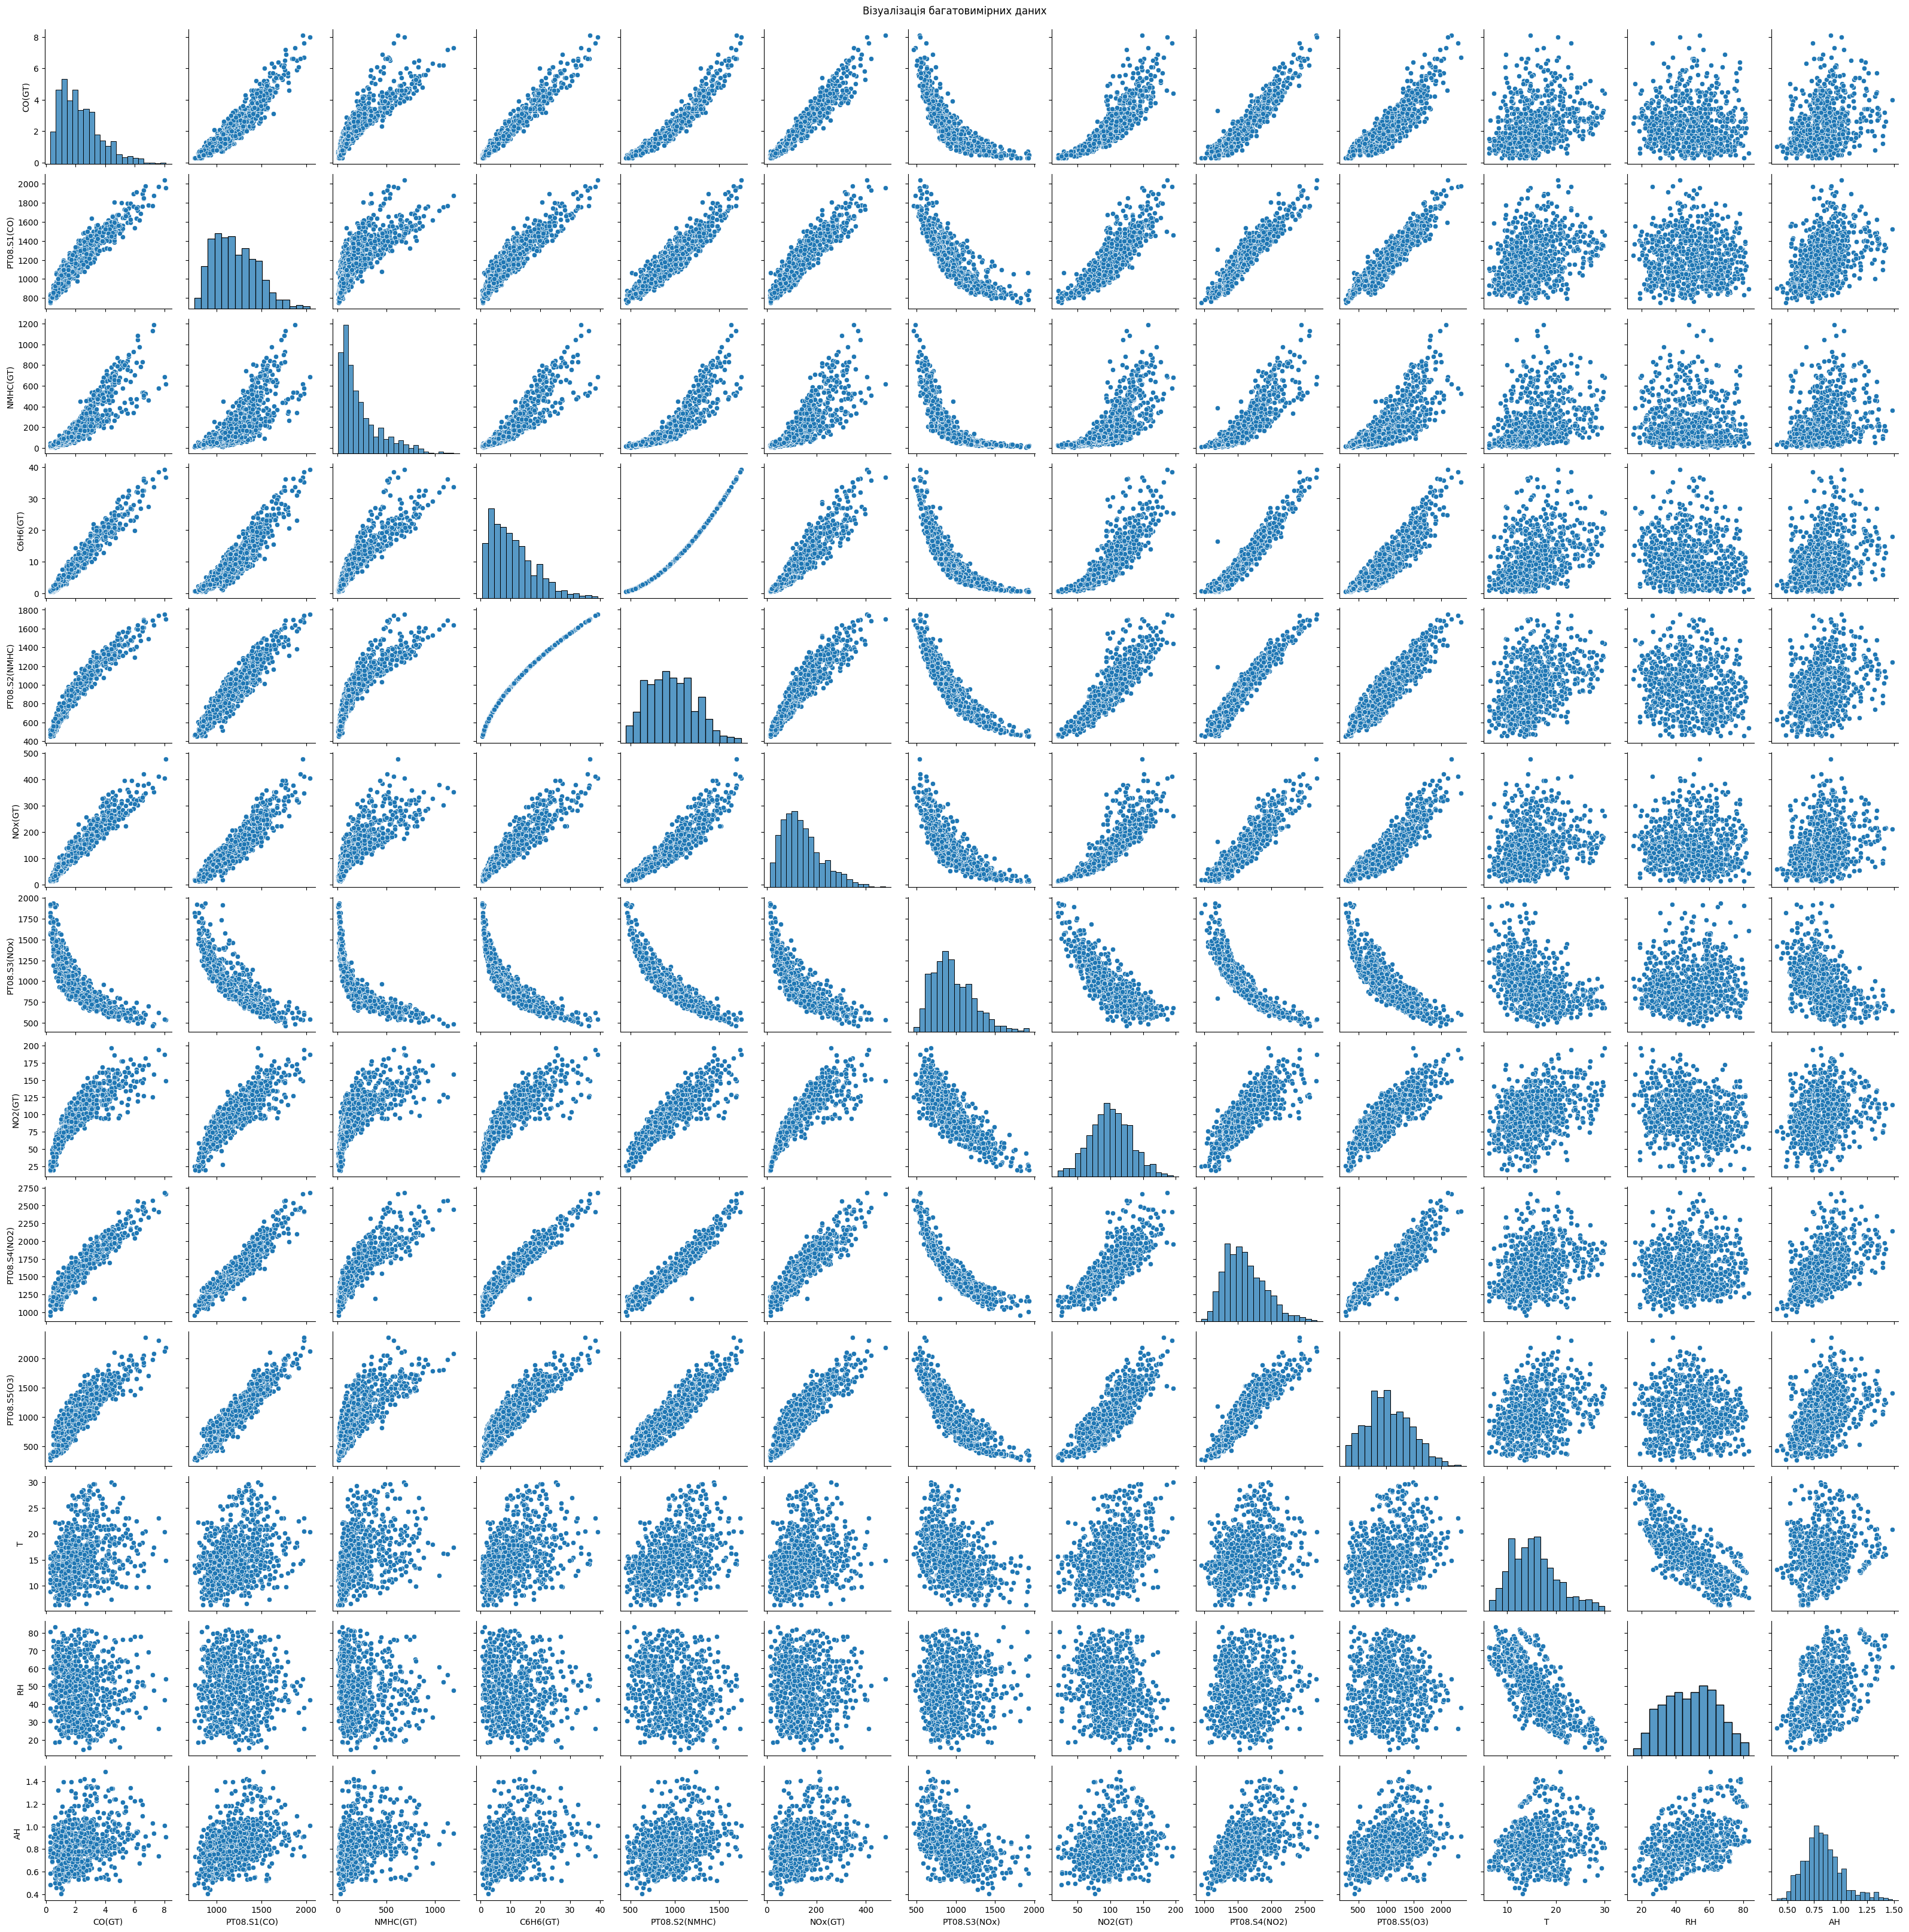

Time is 8.002855 seconds


In [30]:
start_time = timeit.default_timer()

fig = plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(dataframe)
pairplot.fig.suptitle("Візуалізація багатовимірних даних", y=1)
plt.show()

end_time = timeit.default_timer()
print(f"Time is {(end_time-start_time):.6f} seconds")

Numpy Array

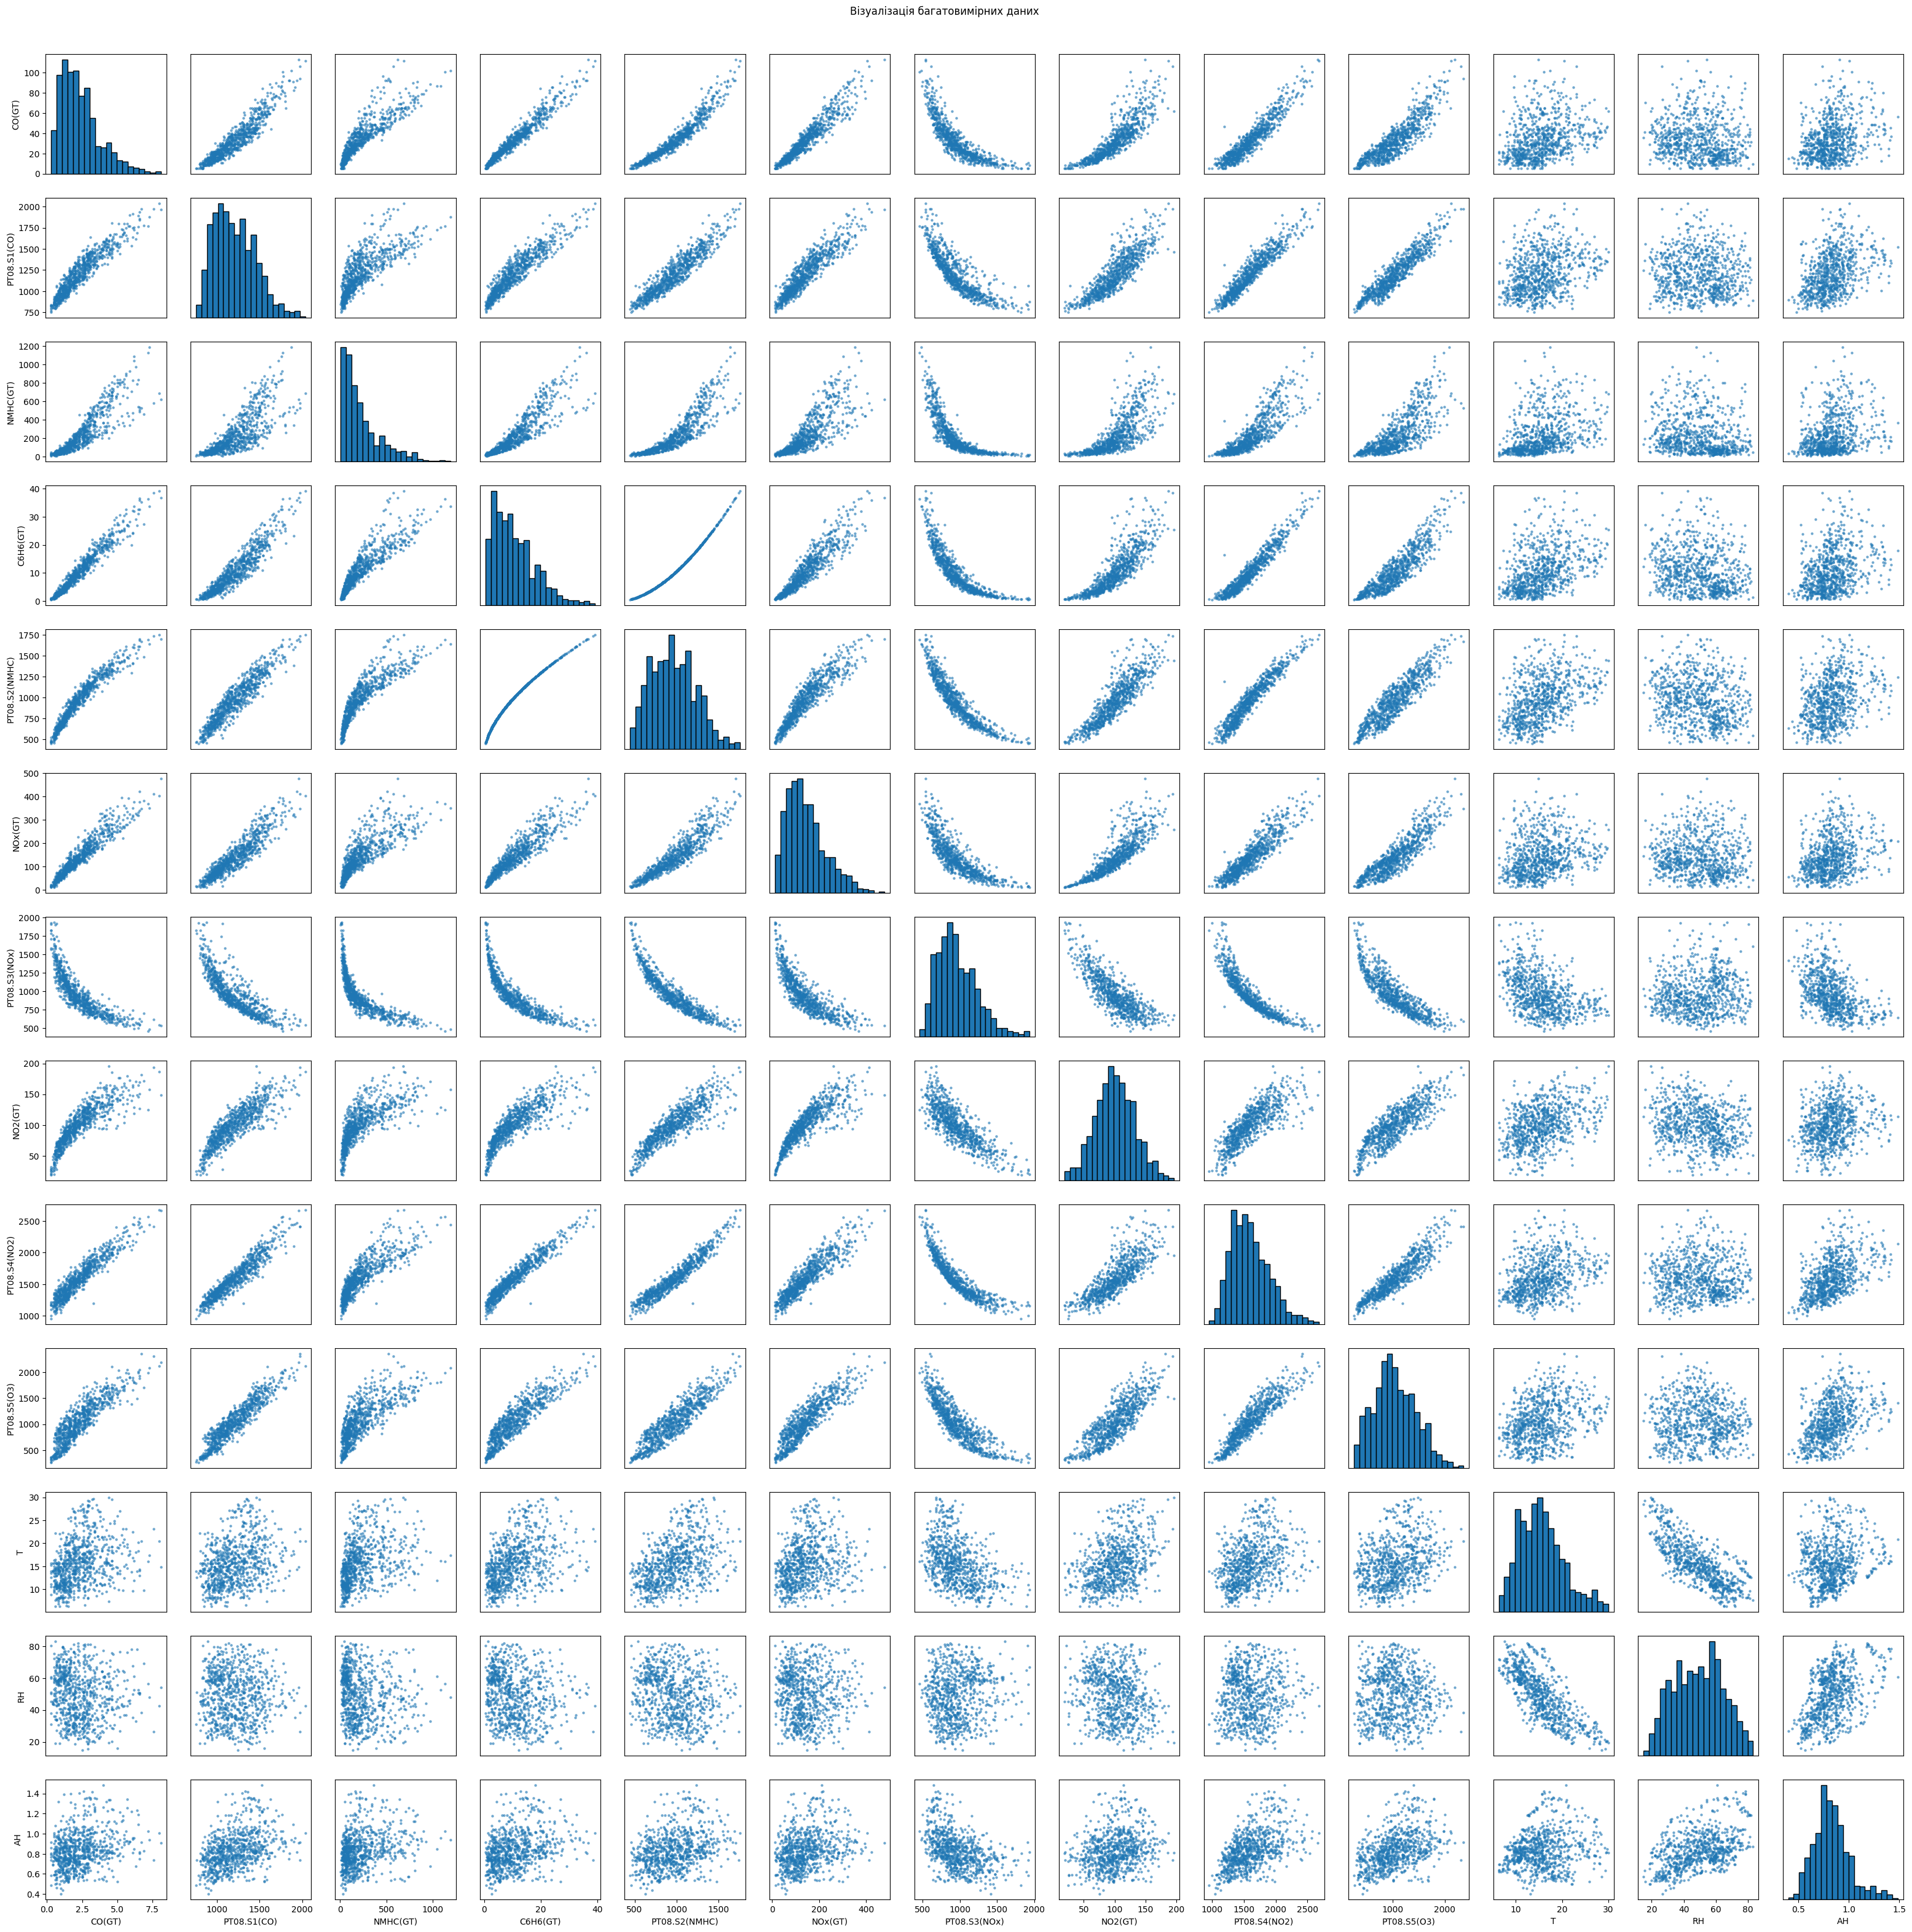

Time is 1.989716 seconds


In [31]:
start_time = timeit.default_timer()
data = dataframe_numpy
labels = [
    "Date", "Time", "CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)",
    "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)",
    "T", "RH", "AH"
]

num_data = data[:, 2:].astype(float)
num_labels = labels[2:]

p = num_data.shape[1]
fig, axes = plt.subplots(p, p, figsize=(3*p, 3*p))

for i in range(p):
    for j in range(p):
        ax = axes[i, j]
        if i == j:
            ax.hist(num_data[:, i], bins=20, edgecolor='black')
        else:
            ax.scatter(num_data[:, j], num_data[:, i], s=5, alpha=0.5)

        if i == p-1:
            ax.set_xlabel(num_labels[j])
        else:
            ax.set_xticks([])
        if j == 0:
            ax.set_ylabel(num_labels[i])
        else:
            ax.set_yticks([])

fig.suptitle("Візуалізація багатовимірних даних", y=0.9)
plt.show()

end_time = timeit.default_timer()
print(f"Time is {(end_time-start_time):.6f} seconds")

Підсумок
---

#### Частина 1

| Задание | Pandas (s)   | NumPy (s)    |
|:--------|:-------------|:-------------|
| 1       | 0.139342     | 2.501612     |
| 2       | 4.831838     | 12.786015    |
| 3       | 0.365070     | 5.766417     |
| 4       | 7.606045     | 16.924679    |
| 5       | 4.632472     | 6.673127     |

#### Частина 2

| Задание | Pandas (s)   | NumPy (s)    |
|:--------|:-------------|:-------------|
| 1       | 0.146181     | 0.214188     |
| 2(1)    | 0.142636     | 0.141291     |
| 2(2)    | 0.162953     | 0.171023     |
| 3       | 2.272604     | 2.289300     |
| 4       | 0.919228     | 0.859267     |
| 5       | 0.267262     | 0.330644     |
| 6       | 0.845116     | 0.129240     |
| 7       | 8.002855     | 1.989716     |

Бачимо, що у першій частині по часу роботи коду безшансово програє NumPy.

Але у другій частині все не так однозначно. Перші 5 завдань виконувались за схожий час в обох випадках, а от останні 2 виконувались набагато швидше через NumPy.

Але під час виконання лаброботи я сформував свою думку і можу сказати, що використовувати Pandas набагато легше і багато чого вже є в самій бібліотеці, а от на написання частин з NumPy я витратив десь у два рази більше часу.

##### Підсумуючи, я би рекомендував використовувати pandas, якщо є така можливість. А от якщо швидкість з pandas виходить незадовільна, то можна спробувати обробити за допомогою NumPy.
##### Зручність Pandas 5/5, NumPy 3.5/5.